In [17]:
from catboost import CatBoostClassifier, Pool, cv, metrics
from sklearn.metrics import accuracy_score
#from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np

In [2]:
traindata = np.load('CatTrainSet.npy',allow_pickle=True)
testdata = np.load('CatTestSet.npy',allow_pickle=True)

In [3]:
testdata = testdata[()]
traindata = traindata[()]
for key in testdata:
    print(key)

Train Labels
Subband
Sum Prof


In [4]:
testlabels = testdata['Train Labels']
testsub = testdata['Subband']
testprof = testdata['Sum Prof']

In [5]:
trainlabels = traindata['Train Labels']
trainsub = traindata['Subband']
trainprof = traindata['Sum Prof']

In [6]:
len(trainlabels)

6444

In [7]:
print(trainlabels[1])

0.0


In [6]:
vallabels = []
valsub = []
valprof = []
for i in range(1200):
    vallabels.append(trainlabels[i])
    valsub.append(trainsub[i])
    valprof.append(trainprof[i])
    tr

In [18]:
#Build Model

profmodel = CatBoostClassifier(
    custom_loss=[metrics.Accuracy()],
    random_seed=42,
    logging_level='Silent'
)

In [19]:
#Fitting/Training

profmodel.fit(
    trainprof, trainlabels,
    #cat_features=categorical_features_indices,
    eval_set=(valprof, vallabels),
#     logging_level='Verbose',  # you can uncomment this for text output
    plot=True
);

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [21]:
profmodel.save_model("PulseProfCatboostModel")

In [ ]:
#CrossValidation

In [24]:
predictions = profmodel.predict(testprof)
predictions_probs = profmodel.predict_proba(testprof)

In [25]:
loadpredictions = loadpp.predict(testprof)
loadpredictions_probs = loadpp.predict_proba(testprof)

In [26]:
print(loadpredictions[:10])
print(loadpredictions_probs[:10])

[1. 0. 0. 0. 1. 1. 1. 0. 0. 0.]
[[1.70171446e-03 9.98298286e-01]
 [9.90679889e-01 9.32011089e-03]
 [9.23411980e-01 7.65880204e-02]
 [9.73134862e-01 2.68651376e-02]
 [1.76943975e-01 8.23056025e-01]
 [2.32729302e-03 9.97672707e-01]
 [1.88164600e-03 9.98118354e-01]
 [7.02121390e-01 2.97878610e-01]
 [9.60953703e-01 3.90462972e-02]
 [9.99294289e-01 7.05710844e-04]]


In [25]:
print(predictions[:10])
print(predictions_probs[:10])

[1. 0. 0. 0. 1. 1. 1. 0. 0. 0.]
[[1.70171446e-03 9.98298286e-01]
 [9.90679889e-01 9.32011089e-03]
 [9.23411980e-01 7.65880204e-02]
 [9.73134862e-01 2.68651376e-02]
 [1.76943975e-01 8.23056025e-01]
 [2.32729302e-03 9.97672707e-01]
 [1.88164600e-03 9.98118354e-01]
 [7.02121390e-01 2.97878610e-01]
 [9.60953703e-01 3.90462972e-02]
 [9.99294289e-01 7.05710844e-04]]


In [26]:
predictions_probs[0][0]

0.0017017144635169679

In [27]:
posprobs = []
for i in range(len(predictions)):
    posprobs.append(predictions_probs[i][1])

AUC Score: 0.969145


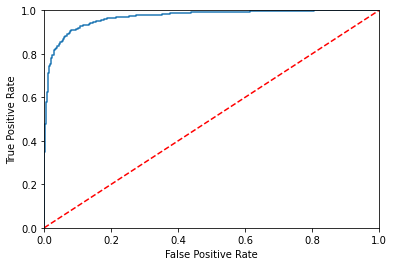

In [30]:
falsepos, truepos, thresholds = metrics.roc_curve(testlabels, posprobs)
display = metrics.RocCurveDisplay(fpr=falsepos, tpr=truepos)
auc = metrics.auc(falsepos, truepos)
print("AUC Score:", auc)
display.plot()
plt.xlim([0,1])
plt.ylim([0,1])
plt.plot([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],"r--")

In [7]:
#Building the model
submodel = CatBoostClassifier(
    custom_loss=[metrics.Accuracy()],
    random_seed=42,
    logging_level='Silent'
)

In [8]:
#Flattening the 2d data
trainsub1 = np.array(trainsub)
trainsub2 = trainsub1.reshape(len(trainsub1),-1)
testsub1 = np.array(testsub)

testsub2 = testsub1.reshape(len(testsub1),-1)
valsub1 = np.array(valsub)
valsub2 = valsub1.reshape(len(valsub1),-1)

In [25]:
np.shape(testsub2)


(2000, 25600)

In [9]:
submodel.fit(
    trainsub2, trainlabels,
    #cat_features=categorical_features_indices,
    eval_set=(valsub2, vallabels),
#     logging_level='Verbose',  # you can uncomment this for text output
    plot=False
);

In [11]:
subpredictions = submodel.predict(testsub2)
subpredictions_probs = submodel.predict_proba(testsub2)

In [12]:
subposprobs = []
for i in range(len(subpredictions)):
    subposprobs.append(subpredictions_probs[i][1])

AUC Score: 0.9881489999999999


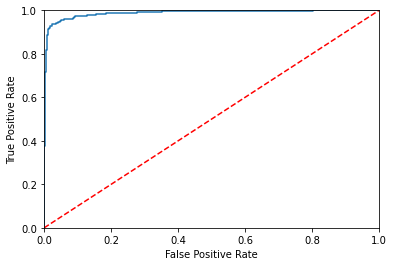

In [15]:
falsepos, truepos, thresholds = metrics.roc_curve(testlabels, subposprobs)
display = metrics.RocCurveDisplay(fpr=falsepos, tpr=truepos)
auc = metrics.auc(falsepos, truepos)
print("AUC Score:", auc)
display.plot()
plt.xlim([0,1])
plt.ylim([0,1])
plt.plot([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],"r--")

In [20]:
submodel.save_model("SubCatboostModel")

In [23]:
loadpp = CatBoostClassifier()

In [24]:
loadpp.load_model("PulseProfCatboostModel")

In [ ]:
predictions = profmodel.predict(testprof)
predictions_probs = profmodel.predict_proba(testprof)